[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Aplicaciones-Financieras/blob/main/Semana2/2_Autoencoders_DeteccionFraude.ipynb)

Recordatorio

Una red neuronal es sola una funcion f(x) = y

La funcion de activación es por capa

# Dependencias

In [ ]:
# Puede no ser necesaria si ya tienen instalado plotly
#!pip install -U plotly

In [ ]:
# Instalar la versión ESPECÍFICA de un módulo
!pip install pandas=='2.1.4'

In [ ]:
# Modulos instalados y sus versiones
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, mean_squared_error, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras import regularizers

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import seaborn as sns

In [2]:
pio.templates.default = 'plotly_white'

# Datos

Utilizaremos los mismo datos de la clase pasada

https://www.kaggle.com/mlg-ulb/creditcardfraud/data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Cruso-ApsFinancieras/semana3/creditcard.csv")
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [5]:
# El resultado seria 'False' si NO hay valores nulos y sería 'True' si SI hay valores nulos
df.isnull().values.any()

False

In [6]:
# 0: Normal
# 1: Fraudulento

print(df.Class.value_counts())
df.Class.value_counts() / len(df)

Class
0    284315
1       492
Name: count, dtype: int64


Class
0    0.998273
1    0.001727
Name: count, dtype: float64

In [7]:
df[df.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
df[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [9]:
df

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [10]:
df.loc[:, 'V1':'Amount']

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.251412 -0.018307   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.524980  0.247998   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300   
4       0.592941 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  1.475829  0.213454   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.059616  0.214205   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.001396  0.232045   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.127434  0.265245   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 29 columns]

In [11]:
# Separación de características
X = df.iloc[:, 1:-1]
X

V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V20       V21  \
0       0.239599  0.098698  0.363787  0.090794  ...  0.251412 -0.018307   
1      -0.078803  0.085102 -0.255425 -0.166974  ... -0.069083 -0.225775   
2       0.791461  0.247676 -1.514654  0.207643  ...  0.524980  0.247998   
3       0.237609  0.377436 -1.387024 -0.054952  ... -0.208038 -0.108300   
4       0.592941 -0.270533  0.817739  0.753074  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -4.918215  7.305334  1.914428  4.356170  ...  1.475829  0.213454   
284803  0.024330  0.294869  0.584800 -0.975926  ...  0.059616  0.214205   
284804 -0.296827  0.708417  0.432454 -0.484782  ...  0.001396  0.232045   
284805 -0.686180  0.679145  0.392087 -0.399126  ...  0.127434  0.265245   
284806  1.577006 -0.414650  0.486180 -0.915427  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 29 columns]

In [12]:
# Variables objetivos
y = df.Class
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [13]:
import matplotlib.pyplot as plt

In [14]:
normal_df = df[df.Class == 0]
fraud_df = df[df.Class == 1]

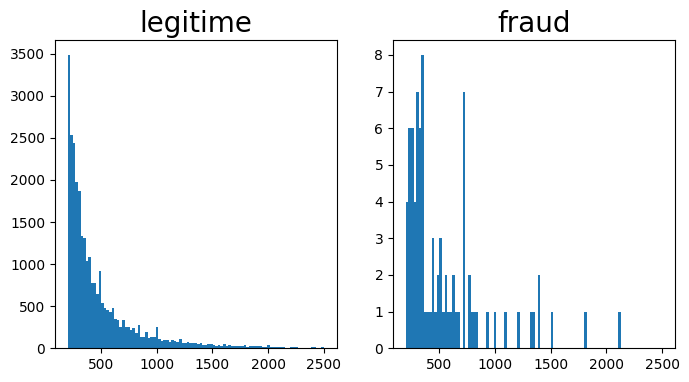

In [15]:
bins = np.linspace(200, 2500, 100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax = axes.ravel()

ax[0].hist(normal_df.Amount, bins, alpha=1, label='Normal')
ax[0].set_title('legitime', fontsize=20)

ax[1].hist(fraud_df.Amount, bins, alpha=1, label='Fraud')
ax[1].set_title('fraud', fontsize=20)
plt.show()

## División en conjuntos de entrenamiento y prueba

## Estandarización

In [16]:
scaler = StandardScaler() # restar de la media y dividir sobre la desv estandar
scaler.fit(X)
X = scaler.transform(X)

X

array([[-0.69424232, -0.04407492,  1.6727735 , ...,  0.33089162,
        -0.06378115,  0.24496426],
       [ 0.60849633,  0.16117592,  0.1097971 , ..., -0.02225568,
         0.04460752, -0.34247454],
       [-0.69350046, -0.81157783,  1.16946849, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 0.98002374, -0.18243372, -2.14320514, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [-0.12275539,  0.32125034,  0.46332013, ...,  0.26960398,
         0.31668678, -0.31324853],
       [-0.27233093, -0.11489898,  0.46386564, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) # train_size=0.8

In [18]:
X_train_norm = X_train

In [19]:
X_train.shape, X_test.shape

((227845, 29), (56962, 29))

In [20]:
y_train.value_counts()/len(y_train)

Class
0    0.998253
1    0.001747
Name: count, dtype: float64

In [21]:
y_test.value_counts()/len(y_test)

Class
0    0.99835
1    0.00165
Name: count, dtype: float64

"If you torture the data long enough, it will confess" Ronald H. Coase

# Modelo

## Configuración del modelo

In [22]:
input_dim = X_train_norm.shape[1] # Número de columnas: 29
encoding_dim = 14
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-4 # que tanto va aprender la red neuronal por el gradiente por cada vez que pasan los datos

In [23]:
input_dim

29

In [24]:
print(f'{1e-4: .9f}')

 0.000100000


## Arquitectura de la red

In [25]:
# Hiperparámetros muy importantes:
# - learning rate
# - batch size

In [26]:
# Creación de las capas del modelo como si fueran legos
input_layer = Input(shape=(29, ))

# 14 neuronas de 29 features
# el regularizador para minimizar el overfitting,
# estas reducen la dimension para obtener mas relevante
encoder = Dense(14, activation="relu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder2 = Dense(7, activation="relu")(encoder)

# estas reproducen los datos originales
# con la misma info condensada = 7 entonces quiero volver al tamaño original,
# esto busca saber quienes se comportan en lo comun y quienes como valores atipios
decoder = Dense(7, activation='relu')(encoder2)
decoder_f = Dense(29, activation='relu')(decoder)


autoencoder = Model(inputs=input_layer, outputs=decoder_f)

In [27]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 14)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 29)                  │             232 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813 (3.18 KB)

 Trainable params: 813 (3.18 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
autoencoder.compile(loss='mean_squared_error',
                    optimizer='adam') # la funcion de pedida esta sujeta a que tan bueno es para predecir las variables ya quye recordemos que se condensan para tener las mas relevantes y estas deben de poder recrear las otras

### Con las lineas de abajo pueden decidir que epoca de entrenamiento guardar - el mejor modelo

# cp = ModelCheckpoint(filepath="autoencoder_fraud.keras",
#                                save_best_only=True,
#                                verbose=0)

## Entrenamiento

In [29]:
history = autoencoder.fit(X_train_norm, X_train_norm, # el modelo no recibi las Ys, ya que en este caso no metemos variables objetivos,
                          epochs=100, #
                          batch_size=2048, # de cuantas datos va pasando el modelo
                          shuffle = True,
                          validation_split=.2,
                          verbose=1,
                        #   callbacks = cp
                          ).history
                          # funcion de perdida, error cuadradico medio
                          # si se separan loss y loss de validacion, implicaria overfitting

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.0368 - val_loss: 1.6103
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5039 - val_loss: 1.2199
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1731 - val_loss: 1.0293
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0115 - val_loss: 0.9927
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0084 - val_loss: 0.9811
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9772 - val_loss: 0.9689
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9904 - val_loss: 0.9565
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9525 - val_loss: 0.9479
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9497 - val_loss: 0.9428
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9414 - val_loss: 0.9396
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9553 - val_loss: 0.9373
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.

In [30]:
90*2048, X_train_norm.shape[0]*.8 # 90 pasadas igualan el size del df normal

(184320, 182276.0)

In [31]:
# Comando para recuperar los datos guardados del modelos, en este caso se guardaria la mejor epoca nada mas

# autoencoder = load_model('autoencoder_fraud.keras') # guardar modelo ya creado

## Evaluación

In [32]:
history

{'loss': [1.8885732889175415,
  1.417893886566162,
  1.1156463623046875,
  1.011287808418274,
  0.9927539229393005,
  0.9813863039016724,
  0.9677905440330505,
  0.9556125402450562,
  0.9478172063827515,
  0.9432100057601929,
  0.9404409527778625,
  0.9383259415626526,
  0.936656653881073,
  0.9349765181541443,
  0.9330178499221802,
  0.9306092858314514,
  0.9282947778701782,
  0.9264653325080872,
  0.9249046444892883,
  0.9234728813171387,
  0.9221760630607605,
  0.9200412631034851,
  0.9185773730278015,
  0.9168233275413513,
  0.9157804250717163,
  0.9143446683883667,
  0.9123712182044983,
  0.9104005694389343,
  0.9095348715782166,
  0.908296525478363,
  0.9097225069999695,
  0.9064843058586121,
  0.9058839082717896,
  0.9050120115280151,
  0.904892086982727,
  0.9039164185523987,
  0.9035065770149231,
  0.9030739068984985,
  0.9040244221687317,
  0.9025198221206665,
  0.9015592932701111,
  0.9007644057273865,
  0.9004272818565369,
  0.9003099799156189,
  0.9009283185005188,
  0.901

In [33]:
history['loss']

[1.8885732889175415,
 1.417893886566162,
 1.1156463623046875,
 1.011287808418274,
 0.9927539229393005,
 0.9813863039016724,
 0.9677905440330505,
 0.9556125402450562,
 0.9478172063827515,
 0.9432100057601929,
 0.9404409527778625,
 0.9383259415626526,
 0.936656653881073,
 0.9349765181541443,
 0.9330178499221802,
 0.9306092858314514,
 0.9282947778701782,
 0.9264653325080872,
 0.9249046444892883,
 0.9234728813171387,
 0.9221760630607605,
 0.9200412631034851,
 0.9185773730278015,
 0.9168233275413513,
 0.9157804250717163,
 0.9143446683883667,
 0.9123712182044983,
 0.9104005694389343,
 0.9095348715782166,
 0.908296525478363,
 0.9097225069999695,
 0.9064843058586121,
 0.9058839082717896,
 0.9050120115280151,
 0.904892086982727,
 0.9039164185523987,
 0.9035065770149231,
 0.9030739068984985,
 0.9040244221687317,
 0.9025198221206665,
 0.9015592932701111,
 0.9007644057273865,
 0.9004272818565369,
 0.9003099799156189,
 0.9009283185005188,
 0.9011120796203613,
 0.8992251753807068,
 0.898961186408996

In [34]:
# Grafica de la pérdida del modelo en el tiempo
fig = go.Figure()
fig.add_trace(go.Scatter(y = history['loss'], name = 'loss'))
fig.add_trace(go.Scatter(y = history['val_loss'], name = 'val_loss'))
fig.update_layout(
    title = 'Pérdida del modelo',
    xaxis_title = 'Época (epoch)',
    yaxis_title = 'Pérdida (MSE)'
)
fig.show()

In [35]:
X_test_norm = X_test
X_test_pred = autoencoder.predict(X_test_norm)

# Error cuadratico medio, a mano
mse = mean_squared_error(X_test_norm.T, X_test_pred.T, multioutput = 'raw_values')
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})
error_df.describe()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


Reconstruction_error   True_class
count          56962.000000  56962.00000
mean               0.861630      0.00165
std                2.815318      0.04059
min                0.109751      0.00000
25%                0.360758      0.00000
50%                0.544199      0.00000
75%                0.811736      0.00000
max              148.758742      1.00000

In [36]:
error_df # reconstrutuon error - que tanto es distinto del true class a lo que se reconstruyo - en este caso es menor

Reconstruction_error  True_class
168367              0.275517           0
110270              0.445620           0
243562              1.160765           0
74702               0.670560           0
98416               0.200372           0
...                      ...         ...
201941              0.602659           0
244413              0.477294           0
50907               0.295074           0
240691              0.281840           0
79068               0.325107           0

[56962 rows x 2 columns]

In [37]:
df.iloc[151296, :]

Time      95286.000000
V1          -34.549296
V2          -60.464618
V3          -21.340854
V4           16.875344
V5          -19.229075
V6            6.335259
V7           24.422716
V8           -4.964566
V9            0.188912
V10          -8.908182
V11          -0.083514
V12          -2.281866
V13           3.739366
V14           5.989210
V15           2.582162
V16           3.032874
V17           0.530779
V18           4.712398
V19          -6.938297
V20          38.117209
V21          11.502580
V22          -9.499423
V23         -16.513186
V24           0.744341
V25          -7.081325
V26          -2.604551
V27          -3.550963
V28           3.250802
Amount    18910.000000
Class         0.000000
Name: 151296, dtype: float64

In [38]:
error_df[error_df.True_class == 1] # para clase 1 , el error es mayor a 1 lo que implicaría que son valores atipicos porque cuestan de reproducir

Reconstruction_error  True_class
45203               9.984802           1
251866              9.116915           1
77387               7.991682           1
111690              7.553511           1
42856              64.400047           1
...                      ...         ...
77682              25.719463           1
147548             12.947903           1
222133              8.952608           1
249607              8.225876           1
249239              1.055561           1

[94 rows x 2 columns]

<Axes: >

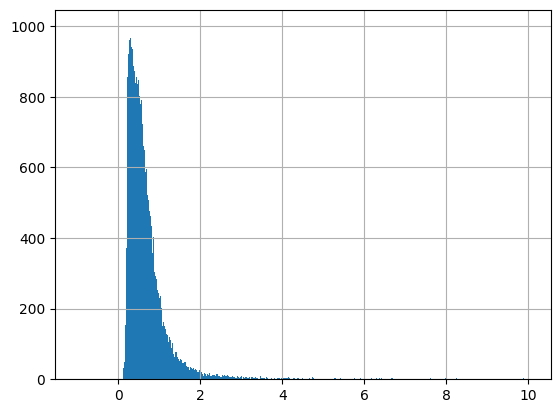

In [39]:
error_df.Reconstruction_error.hist(bins=1000, range=(-1,10)) # para ver lo comun que es el error de construccion

La precision y el recall son muy importantes, y a veces hay que buscar el modo de optimizarlos escogiendo un threshold adecuado.

El limite a escoger (threshold) depende de que se desea del modelo. Escoger si preferimos dejar pasar un fraude por etiquetarlo mal o si preferimos etiquetar mas como fraude e invertir en solucionarlos aunque no sean fraude.

In [40]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
px.scatter(x = recall_rt, y = precision_rt, title = 'Precision vs. Recall',
           labels = {
             'x': 'Recall',
             'y': 'Precision'
           })

In [41]:
len(threshold_rt)

56357

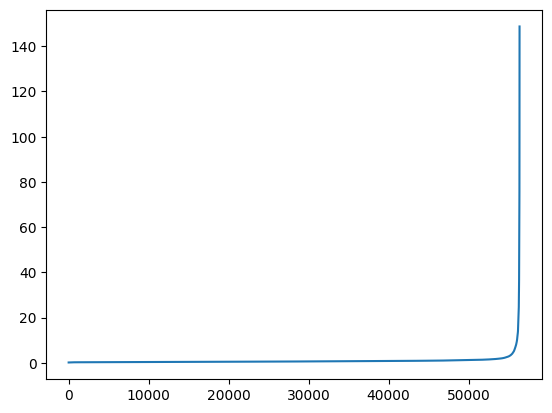

In [42]:
# Grafica de todos los limites (threshold)
plt.plot(threshold_rt[0:])
plt.show()

In [43]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = threshold_rt, y = precision_rt[1:], name = "Precision"))
fig.add_trace(go.Scatter(x = threshold_rt, y = recall_rt[1:], name = "Recall"))

fig.update_layout(
    title = 'Precision y Recall para diferentes umbrales',
    xaxis_title = 'Umbral (threshold)',
    yaxis_title = 'Precision/Recall',
    hovermode="x unified"
)

fig.show()

In [45]:
threshold_fixed = 48 # todo lo que tenga error de construccion mayor a 48 es fraude

In [46]:
fig = go.Figure()

fig.add_trace(go.Scatter(
                    x = error_df[error_df.True_class == 0].index.to_numpy(),
                    y = error_df[error_df.True_class == 0].Reconstruction_error,
                    mode = 'markers',
                    name = 'Normal'))

fig.add_trace(go.Scatter(
                    x = error_df[error_df.True_class == 1].index.to_numpy(),
                    y = error_df[error_df.True_class == 1].Reconstruction_error,
                    mode = 'markers',
                    name = 'Fraude'))
fig.add_hline(threshold_fixed, annotation_text = 'Umbral fijo', line_dash = 'dash')

fig.update_layout(
    title = 'Error de reconstrucción para distintas clases',
    yaxis_title = 'Error de Reconstrucción (MSE)',
    xaxis_title = 'Índice del punto'
)
fig.show()

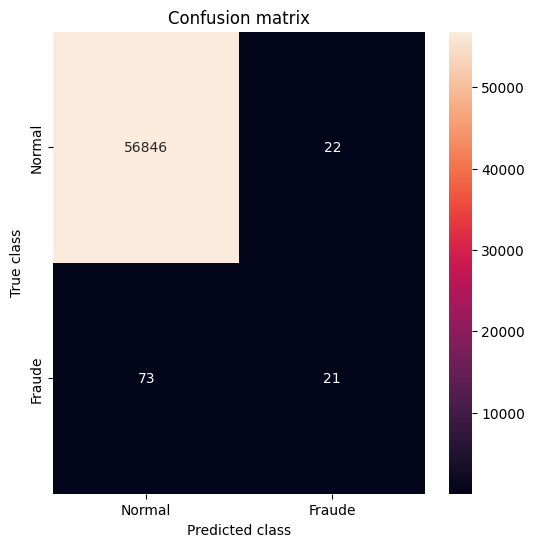

In [47]:
pred_y = [1 if e > 50 else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=['Normal', 'Fraude'], yticklabels=['Normal', 'Fraude'], annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
print(classification_report(y_test, pred_y, digits = 4))

              precision    recall  f1-score   support

           0     0.9987    0.9998    0.9992     56868
           1     0.6000    0.2234    0.3256        94

    accuracy                         0.9985     56962
   macro avg     0.7994    0.6116    0.6624     56962
weighted avg     0.9981    0.9985    0.9981     56962



# Ejercicios

- Agregar más capas al encoder y/o al decoder y comparar los resultados obtenidos. Agregar muchas capas al modelo puede hacer que se sobreajuste. Una manera de mitigarlo es agregando regularización o capas Droupout. Si considera que su modelo tiene sobreajuste agregue cualquiera de las dos o elimine capas.
- ¿Cuál es la utilidad de las funciones de activación? ¿Qué operaciones hacen las distintas [funciones de activación que tiene Keras](https://keras.io/api/layers/activations/)?
- Pruebe con diferentes funciones de activación y evalue los resultados. Las funciones de activación que tiene el modelo son tanh (tangente hiperbólica) y ReLU (Rectified Linear Unit).

# Ligas

- [Post Original](https://blogs.oracle.com/ai-and-datascience/post/fraud-detection-using-autoencoders-in-keras-with-a-tensorflow-backend)

- Info. sobre pulir hiperparámetros (batch_size, learn_rate, epochs,...)
  
  *   https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/
  *   https://www.oreilly.com/library/view/natural-language-processing/9781484242674/

